<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/capstone/7_1b_lyric_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lyric Processing
### Table of Contents
- Clean Text
- Parse Text
- Feature Extraction
  - bag of words

Before we can model our lyric data, we have to clean and parse it. The LyricsGenius API has a weird habit of returning very long text files instead of lyrics, like the entire text of Angela's Ashes and Venus in Furs, for example. Oh well `¯\_(ツ)_/¯`.

After cleaning and parsing the lyrics, we can generate the features for the NLP model. We'll use the bag of words method and model our lyrics with the 200 most common words.

## Import Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [0]:
## change field size to avoid ParseError
#import sys
#import csv

#csv.field_size_limit(sys.maxsize)

#filename = "lyric_test_data_clean"
## set engine="python" to avoid ParseError
## set error_bad_lines=False
##df_lyrics = pd.read_csv(filename + ".csv", index_col=0,
##                        engine="python", error_bad_lines=False)
#df_lyrics = pd.read_csv(filename + ".csv", index_col=0)
## make sure lyric data is type string
#df_lyrics['lyrics_raw'] = df_lyrics['lyrics_raw'].astype(str)
#df_lyrics['lyrics_clean'] = df_lyrics['lyrics_clean'].astype(str)
#df_lyrics.head()

In [0]:
filename = "spotify_lyrics_raw"
df_lyrics = pd.read_csv(filename + ".csv")#, index_col=0)

print(df_lyrics.shape)
print(df_lyrics.dropna().shape)
df_lyrics.head()

(3488, 4)
(3488, 4)


,id,artist,track,lyrics_raw
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,..."
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ..."
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu..."
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...


In [0]:
filename = "spotify_features"
Audio_features = pd.read_csv(filename + ".csv")#, index_col=0)

print(Audio_features.shape)
print(Audio_features.dropna().shape)
Audio_features.head()

(3489, 18)
(3489, 18)


,id,target,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,valence,year
0,7eElVgPcxDqmgGrSwVFI74,0,0.1730,0.796,197236,0.467,True,0.004110,6,0.1260,-10.369,1,59,0.1810,107.901,4,0.516,2017
1,02oAUzv4M0ItuTDy2RT3IT,0,0.2870,0.771,189796,0.431,True,0.000003,10,0.0934,-5.423,1,59,0.0577,107.047,4,0.268,2017
2,5q4BpnMrYEFzLO0dYODj6J,0,0.2390,0.664,271088,0.382,False,0.007490,0,0.0943,-9.977,1,61,0.0470,123.214,4,0.126,2017
3,6Kkt27YmFyIFrcX3QXFi2o,0,0.9200,0.587,171728,0.229,False,0.000000,10,0.1000,-11.254,0,69,0.1280,75.670,4,0.379,2017
4,1Dp7JGFNjvg8Nk0CtMCcnr,0,0.0328,0.487,367391,0.445,True,0.010400,1,0.0778,-10.959,0,60,0.1130,97.031,4,0.180,2017


## Clean text

In [0]:
# view raw data
for i in df_lyrics["lyrics_raw"].head(5):
  display(i[:100])
  print()

'[Intro]\nNight, midnight, lose my mind\nNight, midnight, lose my mind\nNight, midnight, lose my mind\n(W'

"[Verse 1]\nA couple rebel top gun pilots\nFlying with nowhere to be\nDon't know you super well\nBut I th"

'[Verse 1]\nWell, summer slipped us underneath her tongue\nOur days and nights are perfumed with obsess'

"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hurt me, crying in the taxi\nHe don't wanna know me\nSays he m"

'Hard Feelings\n\n(Go back and tell it)\n\nPlease could you be tender\nAnd I will sit close to you\nLet’s g'

In [0]:
df_lyrics["lyrics_raw"] = df_lyrics["lyrics_raw"].astype(str)

df_lyrics["length_raw"] = [len(x) for x in df_lyrics["lyrics_raw"]]
df_lyrics["length_raw"].describe()

count      3488.000000
mean      19073.112385
std       77423.079319
min          12.000000
25%         981.750000
50%        1409.000000
75%        2034.000000
max      825041.000000
Name: length_raw, dtype: float64

In [0]:
df_lyrics.sort_values(by=['length_raw']).head(5)

,id,artist,track,lyrics_raw,length_raw
1609,5CeTuypSIJIOq0nUs4uhBh,de hofnar,vogelvlucht,Instrumental,12
3219,0RTjFVHvqjTdpX2NawwyXI,freddie king,stumble,Instrumental,12
3449,6FKasUNG1KT4r9TR9rKdll,allen toussaint,st james infirmary,Instrumental,12
1490,5dRcHQnH0EQUTMUSJrpaug,worakls,flocon de neige,INSTRUMENTAL,12
3473,2i93Q7j5Pxjsy7PBV2oro2,junior kimbrough,most things haven t worked out,Instrumental,12


In [0]:
# drop NaN values
display(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["lyrics_raw"]!='nan']
display(df_lyrics.shape)
df_lyrics.head(5)

(3488, 5)

(3488, 5)

,id,artist,track,lyrics_raw,length_raw
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ...",1824
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386


In [0]:
# drop duplicates
display(df_lyrics.shape)
df_lyrics = df_lyrics.drop_duplicates(keep=False)
display(df_lyrics.shape)
df_lyrics.head(5)

(3488, 5)

(3488, 5)

,id,artist,track,lyrics_raw,length_raw
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ...",1824
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386


### Shortest Lyrics

count      3488.000000
mean      19073.112385
std       77423.079319
min          12.000000
25%         981.750000
50%        1409.000000
75%        2034.000000
max      825041.000000
Name: length_raw, dtype: float64

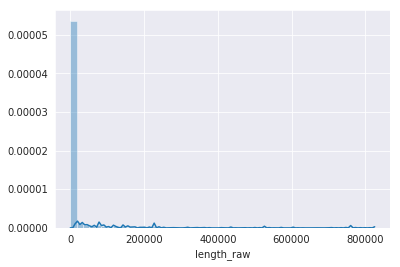

In [0]:
display(df_lyrics["length_raw"].describe())
sns.distplot(df_lyrics["length_raw"])
plt.show()

count      3488.000000
mean      19073.112385
std       77423.079319
min          12.000000
25%         981.750000
50%        1409.000000
75%        2034.000000
max      825041.000000
Name: length_raw, dtype: float64

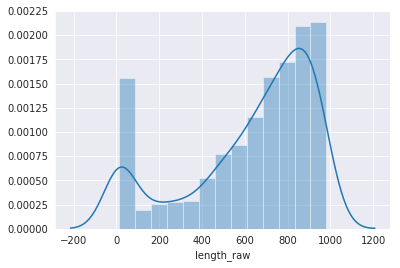

In [0]:
# drop songs that are too short to process
display(df_lyrics["length_raw"].describe())
sns.distplot(df_lyrics["length_raw"]
             [df_lyrics["length_raw"]<df_lyrics["length_raw"]
              .quantile(q=.25)])
plt.show()

In [0]:
variance = df_lyrics["length_raw"][df_lyrics["length_raw"] < 
                                   df_lyrics["length_raw"].quantile(q=.10)].std()
print("variance: {}".format(variance))
too_short = df_lyrics["length_raw"].quantile(q=.10) - variance*2
print(df_lyrics[df_lyrics["length_raw"]<too_short].shape)
df_lyrics["length_raw"][df_lyrics["length_raw"]<too_short].describe()
display(df_lyrics[df_lyrics["length_raw"]<too_short].tail(5))

variance: 238.74506888631498
(118, 5)


,id,artist,track,lyrics_raw,length_raw
3438,3uo1LMmWz3WrnAea1e3HUu,freddie king,hideaway,[Instrumental],14
3449,6FKasUNG1KT4r9TR9rKdll,allen toussaint,st james infirmary,Instrumental,12
3455,6nS9crd0L3jh2zbGCPGkiC,bruce cockburn,when it s gone it s gone,Instrumental,12
3473,2i93Q7j5Pxjsy7PBV2oro2,junior kimbrough,most things haven t worked out,Instrumental,12
3475,77xNKAq581eD62ipzK81yc,skip james,hard time killin floor blues,Hard times here an' everywhere I go\nTime is h...,159


(3488, 5)
(3370, 5)


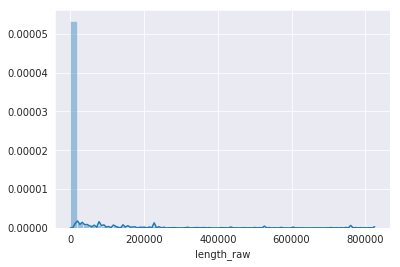

In [0]:
print(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["length_raw"]>too_short]
print(df_lyrics.shape)
sns.distplot(df_lyrics["length_raw"])
plt.show()

### Longest Lyrics

In [0]:
df_lyrics = df_lyrics.sort_values(by=['length_raw'], ascending=0)
df_lyrics.head(5)

,id,artist,track,lyrics_raw,length_raw
3291,4yyUQQ8M2AEVY8h7CyEAlX,furry lewis,judge harsh blues alternate take,CHAPTE...,825041
2428,7JbTESh9jcBAjqqJxGMrbD,lennie gallant,tales of the phantom ship,CHAPTE...,825041
1160,0j3k6gGcIn3xt1xO7eyLOc,julien marchal,insight xiv,CHAPTE...,825041
3263,4T9Jpft8jvZAP57aE3VdCt,dr john,down in new orleans from the princess and the ...,CHAPTE...,825041
2382,1V5obvn19riNXWcc7TUIb8,leeroy stagger,until the end of time,CHAPTE...,825041


In [0]:
for i in df_lyrics["lyrics_raw"].head(5):
  display(i[:200])

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

'\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 CHAPTER ONE\n\nNAMES OF PEOPLE: THE DUCHESSE DE GUERMANTES — SAINT-LOUP AT DONCIÈRES — MME. DE VILLEPARISIS AT HOME — MY GRANDMOTHER’S ILLNESS — BERGOTTE’S ILLNES'

count      3370.000000
mean      19739.746588
std       78683.835351
min         177.000000
25%        1028.000000
50%        1435.000000
75%        2061.750000
max      825041.000000
Name: length_raw, dtype: float64

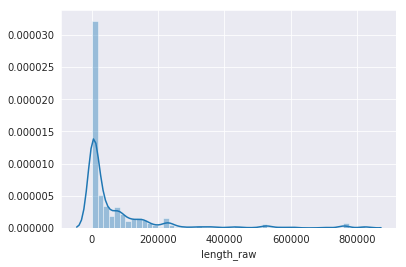

In [0]:
display(df_lyrics["length_raw"].describe())
sns.distplot(df_lyrics["length_raw"][df_lyrics["length_raw"]
                                     >df_lyrics["length_raw"]
                                     .quantile(q=.75)])
plt.show()

In [0]:
df_lyrics["length_raw"][df_lyrics["length_raw"]
                        >df_lyrics["length_raw"]
                        .quantile(q=.75)].describe()

count       843.000000
mean      75231.051008
std      143735.924669
min        2062.000000
25%        2685.000000
50%       13959.000000
75%       80423.500000
max      825041.000000
Name: length_raw, dtype: float64

In [0]:
variance = df_lyrics["length_raw"][df_lyrics["length_raw"] < 
                                   df_lyrics["length_raw"].quantile(q=.85)].std()
print("variance: {}".format(variance))
too_long = df_lyrics["length_raw"].quantile(q=.85) + variance*2
print(df_lyrics[df_lyrics["length_raw"]>too_long].shape)
df_lyrics["length_raw"][df_lyrics["length_raw"]>too_long].describe()
display(df_lyrics[df_lyrics["length_raw"]>too_long].tail(5))

variance: 654.98493650246
(498, 5)


,id,artist,track,lyrics_raw,length_raw
3454,0OMA1sAHJvRHnBdBLdyOf5,charlie parr,over the red cedar,From: Christopher Jordan Dorner /7648\n\nTo: A...,65366
3458,5msUkViWuGHXmH74byeBQn,junior wells,she s a sweet one,OPENING MONOLOGUE\n\nThe thing I don’t underst...,19248
3459,2uQfgaV796QLHJCVOP4bn1,john hammond,2 19,10/1\niKON - NEW KIDS: THE FINAL - 4/4\nKero K...,13873
3465,7KotNh8bE906njI7tnMAME,big walter horton,have a good time,OUTSIDE THE CRISPUS ATTUCKS COMPLEX\n\nLuke Ca...,30535
3469,0E0ZCgyjnMEcPrl46by8tt,ray bonneville,shake off them blues,As we there are where are we are we there from...,91586


(3488, 5)
(2990, 5)


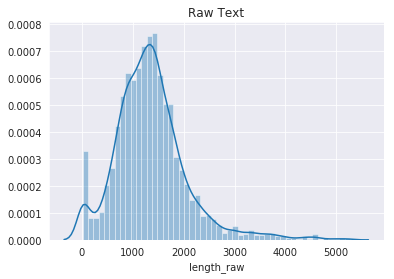

In [0]:
print(df_lyrics.shape)
df_lyrics = df_lyrics[df_lyrics["length_raw"]<too_long]
print(df_lyrics.shape)
sns.distplot(df_lyrics["length_raw"])
plt.title("Raw Text")
plt.show()

In [0]:
df_lyrics = df_lyrics.sort_index()
df_lyrics.head()

,id,artist,track,lyrics_raw,length_raw
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ...",1824
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386


### RegEx

In [0]:
#
import re
def text_cleaner(text):
  doc = re.sub(r'--',' ', text)
  # remove special chars
  doc = re.sub(r'\W', ' ', doc)
  # remove all single characters
  doc = re.sub(r'\s+[a-zA-Z]\s+', ' ', doc)
  # remove single characters from the start
  doc = re.sub(r'\^[a-zA-Z]\s+', ' ', doc)
  # set to lowercase
  doc = doc.lower()
  # remove line breaks
  doc = re.sub(r"\n", " ", doc)
  # remove music terminology
  doc = re.sub(r"intro", "", doc)
  doc = re.sub(r"chorus", "", doc)
  doc = re.sub(r"verse", "", doc)
  doc = re.sub(r"outro", "", doc)
  doc = re.sub(r"hook", "", doc)
  # remove numbers
  doc = re.sub(r"[0-9]", "", doc)
  # substituting multiple spaces with single space
  doc = re.sub(r'\s+', ' ', doc, flags=re.I)
  return doc

In [0]:
df_lyrics["lyrics_clean"] = df_lyrics["lyrics_raw"]
df_lyrics["lyrics_clean"] = [text_cleaner(lyric) for lyric in df_lyrics["lyrics_clean"]]

In [0]:
type(df_lyrics["lyrics_clean"])
print(len(df_lyrics["lyrics_clean"][0]))
display(df_lyrics["lyrics_raw"][0][:100])
print(df_lyrics["lyrics_clean"][0][:100])

2275


'[Intro]\nNight, midnight, lose my mind\nNight, midnight, lose my mind\nNight, midnight, lose my mind\n(W'

 night midnight lose my mind night midnight lose my mind night midnight lose my mind when you get to


In [0]:
df_lyrics["length_clean"] = [len(x) for x in df_lyrics["lyrics_clean"]]
display(df_lyrics.head())

,id,artist,track,lyrics_raw,length_raw,lyrics_clean,length_clean
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485,night midnight lose my mind night midnight lo...,2275
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795,couple rebel top gun pilots flying with nowhe...,1621
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ...",1824,well summer slipped us underneath her tongue ...,1665
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305,one two baby really hurt me crying in the tax...,1157
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386,hard feelings go back and tell it please could...,2189


count    2990.000000
mean     1235.825753
std       652.127063
min        12.000000
25%       836.250000
50%      1179.500000
75%      1529.000000
max      4857.000000
Name: length_clean, dtype: float64

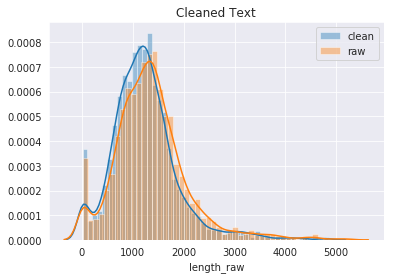

In [0]:
display(df_lyrics["length_clean"].describe())
sns.distplot(df_lyrics["length_clean"], label="clean")
sns.distplot(df_lyrics["length_raw"], label="raw")
plt.title("Cleaned Text")
plt.legend()
plt.show()

## Parse Text

In [0]:
%%time

import spacy

# create list to hold spaCy docs
text_parsed = []
text_nostops = []

# parse cleaned text
# instantiate nlp
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load('en')
spacy_text = nlp.pipe(df_lyrics['lyrics_clean'], batch_size=10, n_threads=3)

# use spaCy generator to append docs to doc list
for text in spacy_text:
  #text = [token.lemma_ for token in nlp(str(text))]
  text_parsed.append([token.lemma_ for token in nlp(str(text))])
  #text = [token.lemma_ for token in nlp(str(text)) if not token.is_stop]
  text_nostops.append([token.lemma_ for token in nlp(str(text)) if not token.is_stop])

# add spaCy docs to lyrics DF
df_lyrics['lyrics_parsed'] = text_parsed
df_lyrics['length_parsed'] = [len(x) for x in df_lyrics['lyrics_parsed']]
df_lyrics['lyrics_nostops'] = text_nostops
df_lyrics['length_nostops'] = [len(x) for x in df_lyrics['lyrics_nostops']]
display(df_lyrics.head())

,id,artist,track,lyrics_raw,length_raw,lyrics_clean,length_clean,lyrics_parsed,length_parsed,lyrics_nostops,length_nostops
0,7eElVgPcxDqmgGrSwVFI74,lorde,sober,"[Intro]\nNight, midnight, lose my mind\nNight,...",2485,night midnight lose my mind night midnight lo...,2275,"[ , night, midnight, lose, -PRON-, mind, night...",494,"[ , night, midnight, lose, mind, night, midnig...",187
1,02oAUzv4M0ItuTDy2RT3IT,lorde,homemade dynamite,[Verse 1]\nA couple rebel top gun pilots\nFlyi...,1795,couple rebel top gun pilots flying with nowhe...,1621,"[ , couple, rebel, top, gun, pilot, fly, with,...",309,"[ , couple, rebel, gun, pilot, fly, don, know,...",169
2,5q4BpnMrYEFzLO0dYODj6J,lorde,the louvre,"[Verse 1]\nWell, summer slipped us underneath ...",1824,well summer slipped us underneath her tongue ...,1665,"[ , well, summer, slip, -PRON-, underneath, -P...",334,"[ , summer, slip, underneath, tongue, day, nig...",151
3,6Kkt27YmFyIFrcX3QXFi2o,lorde,liability,"[Intro]\nOne, two\n\n[Verse 1]\nBaby really hu...",1305,one two baby really hurt me crying in the tax...,1157,"[ , one, two, baby, really, hurt, -PRON-, cry,...",242,"[ , baby, hurt, cry, taxi, don, wanna, know, s...",101
4,1Dp7JGFNjvg8Nk0CtMCcnr,lorde,hard feelings loveless,Hard Feelings\n\n(Go back and tell it)\n\nPlea...,2386,hard feelings go back and tell it please could...,2189,"[hard, feeling, go, back, and, tell, -PRON-, p...",458,"[hard, feeling, tell, tender, sit, close, let,...",244


CPU times: user 5min 39s, sys: 4.49 s, total: 5min 43s
Wall time: 5min 47s


In [0]:
type(df_lyrics["lyrics_parsed"])
print(len(df_lyrics["lyrics_parsed"][0]))
display(df_lyrics["lyrics_raw"][0][:100])
print(df_lyrics["lyrics_parsed"][0][:100])

494


'[Intro]\nNight, midnight, lose my mind\nNight, midnight, lose my mind\nNight, midnight, lose my mind\n(W'

[' ', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'night', 'midnight', 'lose', '-PRON-', 'mind', 'when', '-PRON-', 'get', 'to', '-PRON-', 'high', 'when', '-PRON-', 'get', 'to', '-PRON-', 'night', 'midnight', 'oh', 'god', 'm', 'clean', 'out', 'of', 'air', 'in', '-PRON-', 'lung', '-PRON-', 'all', 'go', 'play', '-PRON-', 'so', 'nonchalant', '-PRON-', 'time', '-PRON-', 'dance', 'with', 'the', 'truth', 'move', 'alone', 'with', 'the', 'truth', 'ooh', 'hey', '-PRON-', 're', 'sleep', 'through', 'all', 'the', 'day', 'm', 'act', 'like', 'don', 'see', 'every', 'ribbon', '-PRON-', 'use', 'to', 'tie', '-PRON-', 'to', '-PRON-', 'pre', 'but', '-PRON-', 'hip', 'have', 'miss', '-PRON-', 'hip', 'so', 'let', 'get', 'to', 'know', 'the', 'kick', 'will', '-PRON-', 'sway', 'with']


count    2990.000000
mean      255.015719
std       131.992186
min         1.000000
25%       173.000000
50%       243.000000
75%       317.000000
max      1019.000000
Name: length_parsed, dtype: float64

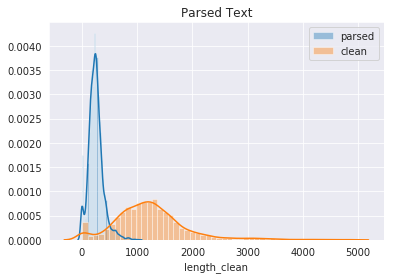

In [0]:
display(df_lyrics['length_parsed'].describe())
sns.distplot(df_lyrics["length_parsed"], label="parsed")
sns.distplot(df_lyrics["length_clean"], label="clean")
plt.title("Parsed Text")
plt.legend()
plt.show()

### save locally

In [0]:
# target value
print(df_lyrics.shape)
Audio_features = Audio_features.loc[df_lyrics.index,:]
print(Audio_features.shape)

(2990, 11)
(2990, 18)


In [0]:
# target value
print("Target class distribution:")
for c in Audio_features["target"].unique():
  class_c = len(Audio_features["target"].loc[Audio_features["target"]==c])/len(Audio_features)
  print("Class {}: {}%".format(c, class_c*100))

Target class distribution:
Class 0: 51.47157190635452%
Class 1: 48.52842809364549%


In [0]:
from google.colab import files
filename = "spotify_features"
Audio_features.to_csv(filename+".csv")
files.download(filename+".csv")

In [0]:
#from google.colab import files
filename = "spotify_lyrics_clean"
df_lyrics.to_csv(filename+".csv")
files.download(filename+".csv")

## Feature Extraction

### Bag of Words

In [0]:
all_words = []
for text in df_lyrics['lyrics_nostops']:
  for word in text:
    all_words.append(word)
    
all_words.remove("-PRON-")
all_words.remove(" ")
#all_words.remove("nan")
print(len(all_words))
print(all_words[:10])

from collections import Counter
common_words = [word[0] for word in Counter(all_words).most_common(1024)]
print(len(common_words))
print(type(common_words))
print(type(common_words[0]))
print(common_words[:10])

360547
['night', 'midnight', 'lose', 'mind', 'night', 'midnight', 'lose', 'mind', 'night', 'midnight']
1024
<class 'list'>
<class 'str'>
['m', 'know', 'don', 'love', 'oh', 'like', 'get', 'go', 'will', 'come']


In [0]:
word_counts = pd.DataFrame(columns=common_words, index=df_lyrics["id"])
word_counts.loc[:, common_words] = 0

display(word_counts.columns)
print(word_counts.shape)
word_counts.head()

Index(['m', 'know', 'don', 'love', 'oh', 'like', 'get', 'go', 'will', 'come',
       ...
       'tiny', 'judge', 'flight', 'fate', 'headlight', 'marry', 'chair', 'aye',
       'cryin', 'walkin'],
      dtype='object', length=1024)

(2990, 1024)


,m,know,don,love,oh,like,get,go,will,come,time,yeah,let,ve,to,feel,want,cause,baby,wanna,way,tell,think,ain,heart,good,,night,right,need,away,say,girl,look,little,win,leave,man,thing,day,...,special,hurry,card,brick,jone,note,snake,swerve,rainy,silent,static,purple,salt,william,stress,dan,calm,fame,trace,lesson,motherfucker,glad,rapper,afterlife,daughter,fever,hardly,trick,conversation,bitter,tiny,judge,flight,fate,headlight,marry,chair,aye,cryin,walkin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
02oAUzv4M0ItuTDy2RT3IT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5q4BpnMrYEFzLO0dYODj6J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6Kkt27YmFyIFrcX3QXFi2o,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1Dp7JGFNjvg8Nk0CtMCcnr,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
%%time
# Create our data frame with features. This can take a while to run.

# Process each row, counting the occurrence of words in each sentence.
for i, text in enumerate(df_lyrics['lyrics_nostops']):

  words = [word for word in text if word in common_words]

  # Populate the row with word counts.
  for word in words:
    word_counts.loc[word_counts.index[i], word] += 1

  # This counter is just to make sure the kernel didn't hang.
  if i % 50 == 0:
    print("Processing row {}".format(i))

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950
Processing row 2000
Processing row 2050
Processing row 2100
Processing row 2150
Processing row 2200
Processing row 2250
Processing row 2300
Processing row 2350
Processing row 2400
Processing row 2450
Processing row 2500
Pro

In [0]:
print(word_counts.shape)
word_counts.head()

(2990, 1024)


,m,know,don,love,oh,like,get,go,will,come,time,yeah,let,ve,to,feel,want,cause,baby,wanna,way,tell,think,ain,heart,good,,night,right,need,away,say,girl,look,little,win,leave,man,thing,day,...,special,hurry,card,brick,jone,note,snake,swerve,rainy,silent,static,purple,salt,william,stress,dan,calm,fame,trace,lesson,motherfucker,glad,rapper,afterlife,daughter,fever,hardly,trick,conversation,bitter,tiny,judge,flight,fate,headlight,marry,chair,aye,cryin,walkin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,3,6,3,0,4,1,0,1,3,0,1,0,2,0,0,3,0,0,0,0,0,0,0,2,1,0,1,4,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
02oAUzv4M0ItuTDy2RT3IT,0,4,1,2,0,0,0,1,4,3,0,1,6,0,1,0,0,0,0,0,0,3,3,0,0,6,1,0,3,0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5q4BpnMrYEFzLO0dYODj6J,1,1,0,1,0,0,0,0,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6Kkt27YmFyIFrcX3QXFi2o,4,2,2,2,0,0,0,3,1,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,2,2,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1Dp7JGFNjvg8Nk0CtMCcnr,4,1,1,6,0,2,0,4,2,1,1,2,3,1,4,1,0,3,0,6,1,3,0,0,2,0,0,0,3,1,2,0,0,4,1,0,3,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


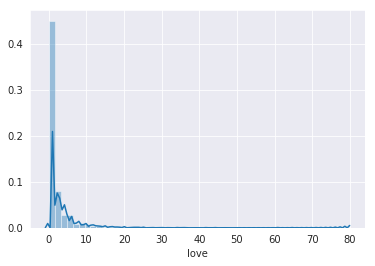

In [0]:
word1 = "love"
word_counts[word1].astype(int).describe()
sns.distplot(word_counts[word1].astype(int))
plt.show();

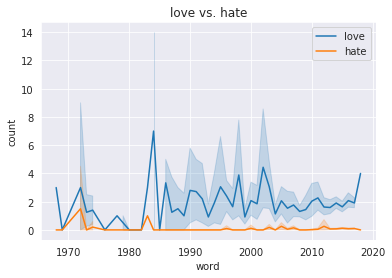

In [0]:
word1 = "love"
word2 = "hate"

sns.lineplot(x=Audio_features["year"], y=word_counts[word1].reset_index(drop=True), label=word1)
sns.lineplot(x=Audio_features["year"], y=word_counts[word2].reset_index(drop=True), label=word2)
plt.ylabel('count')
plt.xlabel('word')
plt.legend()
plt.title('{} vs. {}'.format(word1, word2))
plt.show();

#### Save data locally

In [0]:
#from google.colab import files
filename = 'spotify_word_counts'
word_counts.to_csv(filename+".csv", index=True)
files.download(filename+".csv")